# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# План работы:

1) [Подготовка данных.](#id_1)

2) [Анализ.](#id_2)

3) [Подготовка моделей.](#id_3)

4) [Общий вывод.](#id_4)

<a id='id_1'></a>
# 1. Подготовка данных

### 1.1 Изучение данных

In [1]:
# Импортируем все необходимые для нас библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data = pd.read_csv('/datasets/gold_recovery_full.csv')

In [2]:
# Изучим полный датасет
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


В полном датасете - 87 столбцов и 22716 строк. Все столбцы формата float64, за исключением столбца date - у него формат object. 

In [3]:
data_train.info()
data_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Аналогично исходному датасету - 87 столбцов. Но в данном случае у нас 16860 строк вместо 22716. Что примерно составляет 74% от общего количества (16860 / 22716 * 100% = 74.22081352350766%)

In [4]:
data_test.info()
data_test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


В тестовой выборке - 53 столбца и 5856 строк. Количество строк составляет примерно 76% от исходного датасета (5856 / 22716 * 100% = 25.77918647649234). 

Итак, у нас есть 3 датасета. Исходный датасет, обучающая и тестовая выборка. Соотношение обучающей и тестовой выборки примерно 3 к 1 соответственно. В тестовой выборке количество столбцов меньше чем в остальных (всего 53, в то время как в остальных - 87). Во всех столбцах, за исключением даты - есть пропуски в значениях. 

В названиях некоторых столбцов указаны химические элементы: au (золото), pb (свинец), ag (серебро). Сокращение sol, которое так же присутствует в названиях, скорее всего означает solution (т.е. раствор, либо растворимые вещества). Лучше данные подобного рода уточнить, чтобы не допускать ошибки. Т.к. в условиях данной задачи такой возможности нет - будет отталкиваться от логики выше. 

### 1.2 Проверка рассчета эффективности обогащения

 Вычислим эффективность обогащения на обучающей выборке для признака rougher.output.recovery Т.к. нас интересует золото (Au), то для рассчета эффективности будем использовать столбцы rougher.input.feed_au, rougher.output.concentrate_au и rougher.output.tail_au. 
 
 Эффективность рассчитывается по формуле (C * (F - T)) / (F * (C - T)) * 100, где C — доля золота в концентрате после флотации/очистки (roughet.output.concentrate_au), F — доля золота в сырье/концентрате до флотации/очистки (roughet.input.feed_au), T — доля золота в отвальных хвостах после флотации/очистки (rougher.output.tail_au).

In [5]:
# Создадим отдельный столбец в обучающей выборке rougher.output.recovery2
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
data_train['rougher.output.recovery2'] = (C * (F - T)) / (F * (C - T)) * 100
data_train['rougher.output.recovery2'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery2, dtype: float64

In [6]:
data_train['rougher.output.recovery'].head(5)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [7]:
# Если сравнить первые 5 значений - они полностью совпадают. Вычислим среднюю абсолютную ошибку значений (MAE).
# Но прежде чем вычислить MAE - сравним количество значений в изначальном расчете эффективности и в нынешнем.
data_rougher_recovery = data_train[['rougher.output.recovery', 'rougher.output.recovery2']]
data_rougher_recovery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 2 columns):
rougher.output.recovery     14287 non-null float64
rougher.output.recovery2    14577 non-null float64
dtypes: float64(2)
memory usage: 263.6 KB


In [8]:
# Количество вычислений разное, изначальный расчет эффективности содержит меньше объектов чем созданный нами, а значит удалим
# все пустые строки
data_rougher_recovery = data_rougher_recovery.dropna()
data_rougher_recovery.info()
data_rougher_recovery.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 2 columns):
rougher.output.recovery     14287 non-null float64
rougher.output.recovery2    14287 non-null float64
dtypes: float64(2)
memory usage: 334.9 KB


,rougher.output.recovery,rougher.output.recovery2
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


In [9]:
# Если сравнить первые 5 значений - они полностью совпадают. Вычислим среднюю абсолютную ошибку значений (MAE).
mean_absolute_error(data_rougher_recovery['rougher.output.recovery'], data_rougher_recovery['rougher.output.recovery2'])

9.444891926100695e-15

Значение средней абсолютной ошибки составило 9.444891926100695e-15 (что очень мало), а значит рассчету эффективности можно верить. 

### 1.3 Анализ признаков, недоступных в тестовой выборке. 

In [10]:
# Сравнив разницу в столбцах в тестовой выборке и в основном датафрейме
data.columns.difference(data_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

Мы получили список столбцов, которых нет в тестовой выборке. 

На что можно обратить внимание:

    1) Нет ни одного признака со значением типа параметра - input. А значит, в тестовой выборке присутствуют все входящие данные металлов. 

    2) Присутствуют все рассчетные характерисики (тип параметра - calculation). 

    3) Присутствуют все выходящие данные на разных этапах обработки материала (хвосты и концентраты). 

    4) В списке присутствует рассчет эффективности обработки на разных стадиях.  
    
__Вывод__: в тестовой выборке присутствуют только признаки, которые использовались для обучения модели, отсутствуют рассчеты эффективности и выходные данные на разных этапах, а значит их следует восстановить.

### 1.4 Предобработка данных

In [11]:
# На данном этапе следует восстановить те столбцы, которых нет в тестовой выборке. 
# Сделаем отдельный датафрейм, в который поместим все недостающие столбцы из исходного датафрейма
data_difference = data[['date', 'final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.recovery', 'rougher.output.tail_ag',
       'rougher.output.tail_au', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'secondary_cleaner.output.tail_ag',
       'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol']]
# Объединим получившийся датафрейм с тестовой выборкой по столбцу 'date'
data_test = data_test.merge(data_difference, on='date', how='left')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 87 columns):
date                                                  5856 non-null object
primary_cleaner.input.sulfate                         5554 non-null float64
primary_cleaner.input.depressant                      5572 non-null float64
primary_cleaner.input.feed_size                       5856 non-null float64
primary_cleaner.input.xanthate                        5690 non-null float64
primary_cleaner.state.floatbank8_a_air                5840 non-null float64
primary_cleaner.state.floatbank8_a_level              5840 non-null float64
primary_cleaner.state.floatbank8_b_air                5840 non-null float64
primary_cleaner.state.floatbank8_b_level              5840 non-null float64
primary_cleaner.state.floatbank8_c_air                5840 non-null float64
primary_cleaner.state.floatbank8_c_level              5840 non-null float64
primary_cleaner.state.floatbank8_d_air                5840

In [12]:
# Во всех 3 датафреймах у нас есть пропущенные значения, которые следует обработать. На примере исходного датафрейма попробуем
# удалить все строки с отсутствующими значениями
data_drop = data.dropna()
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  16094 non-null object
final.output.concentrate_ag                           16094 non-null float64
final.output.concentrate_pb                           16094 non-null float64
final.output.concentrate_sol                          16094 non-null float64
final.output.concentrate_au                           16094 non-null float64
final.output.recovery                                 16094 non-null float64
final.output.tail_ag                                  16094 non-null float64
final.output.tail_pb                                  16094 non-null float64
final.output.tail_sol                                 16094 non-null float64
final.output.tail_au                                  16094 non-null float64
primary_cleaner.input.sulfate                         16094 non-null float64
primary_cleaner.input.depressant             

16094 вместо изначальных 22716. Потери практически в треть, а это может повлиять на качество модели в дальнейшем, такой вариант нас не устраивает. А значит нужно искать альтернативный метод.

При наличии возможности - лучше запросить данные, чтобы пропуски не пришлось заполнять самостоятельно. 
Заменить значения на 0 так же будет ошибочным решением.

Можно заменить значения на медианные, но как нам известно из условий задачи "Соседние по времени параметры часто похожи", а значит отсутствующие значения можно заменить предыдущими, тогда вероятность ошибки или потери качества работы модели будет куда ниже. 

In [13]:
# Заменим пропуски предыдущими значениями. 
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22716 non-null float64
final.output.concentrate_pb                           22716 non-null float64
final.output.concentrate_sol                          22716 non-null float64
final.output.concentrate_au                           22716 non-null float64
final.output.recovery                                 22716 non-null float64
final.output.tail_ag                                  22716 non-null float64
final.output.tail_pb                                  22716 non-null float64
final.output.tail_sol                                 22716 non-null float64
final.output.tail_au                                  22716 non-null float64
primary_cleaner.input.sulfate                         22716 non-null float64
primary_cleaner.input.depressant             

In [14]:
data_train = data_train.fillna(method='ffill')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 88 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant             

In [15]:
data_test = data_test.fillna(method='ffill')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 87 columns):
date                                                  5856 non-null object
primary_cleaner.input.sulfate                         5856 non-null float64
primary_cleaner.input.depressant                      5856 non-null float64
primary_cleaner.input.feed_size                       5856 non-null float64
primary_cleaner.input.xanthate                        5856 non-null float64
primary_cleaner.state.floatbank8_a_air                5856 non-null float64
primary_cleaner.state.floatbank8_a_level              5856 non-null float64
primary_cleaner.state.floatbank8_b_air                5856 non-null float64
primary_cleaner.state.floatbank8_b_level              5856 non-null float64
primary_cleaner.state.floatbank8_c_air                5856 non-null float64
primary_cleaner.state.floatbank8_c_level              5856 non-null float64
primary_cleaner.state.floatbank8_d_air                5856

## Вывод по пункту 1:
Итак, пропуски заполнены, все недостающие данные внесены, столбцы обработаны и понятны, можно преступить к анализу.

<a id='id_2'></a>
# 2. Анализ данных

### 2.1 Изменения концентрации металлов на различных стадиях обработки

In [16]:
# Для начала проверим золото(Au)
# Создадим отдельный датафрейм с интересующими нас столбцами
data_au = data[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
                'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]

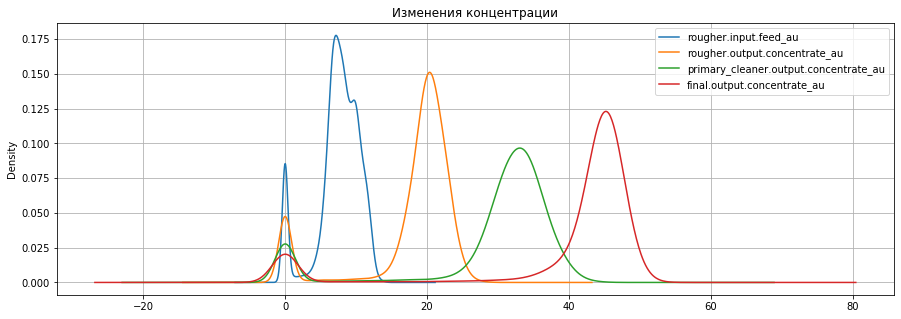

In [17]:
data_au.plot(figsize=(15,5), kind='kde', title='Изменения концентрации', grid='True')

Концентрация золота увеличивается на протяжении всех этапах очистки.

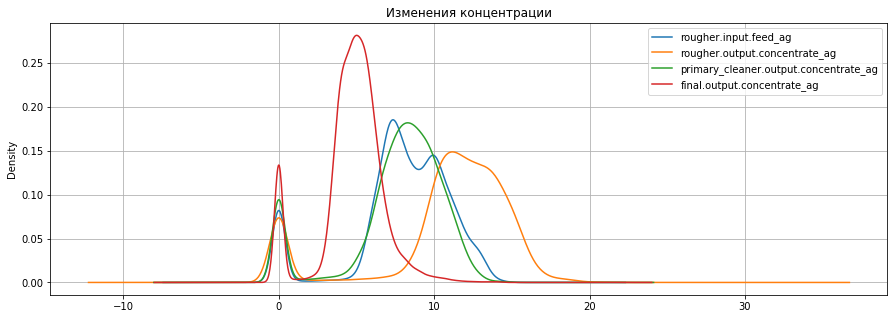

In [18]:
# Аналогично проверим серебро (Ag)
data_ag = data[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
data_ag.plot(kind='kde', figsize=(15,5), title='Изменения концентрации', grid=True)

Концентрация серебра изменяется неравномерно. После флотации концентрация серебра увеличивается, после первичной очистки концентрация серебра возвращается на уровень близкий к изначальному, после финальной очистки - уровень концентрации серебра становится еще меньше.

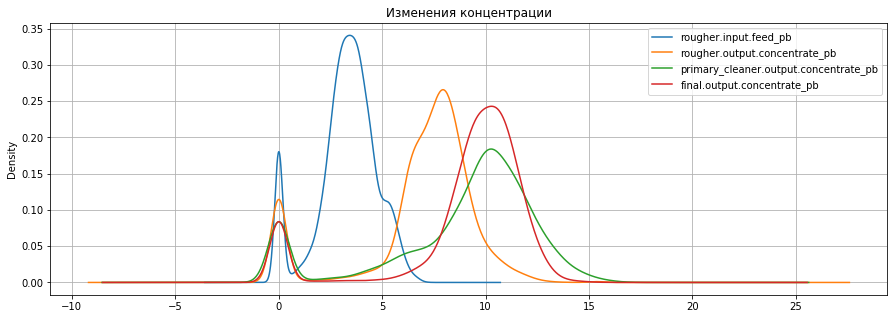

In [19]:
# Теперь проверим свинец (Pb)
data_pb = data[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
                'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]
data_pb.plot(kind='kde', figsize=(15,5), title='Изменения концентрации', grid=True)

После флотации уровень концентрация свинца увеличивается, после первичной обработки уровень концентрации свинца становится еще больше, но заметен разброс больший чем у остальных этапов разброс значений. После финальной очисики - основной уровень концентрации не изменяется, но при этом разброс значений становится меньше.

___Так же на каждом из графиков можно отследить значения на уровне 0, эти значения либо выброса и от них нужно избавиться, либо изначально в сырье не было конкретных элементов___

### 2.2 Сравнение размеров распределения гранул сырья

<function matplotlib.pyplot.show(*args, **kw)>

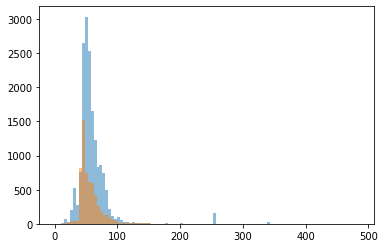

In [20]:
# Сравним размеры сырья перед флотацией на обучающей и тестовой выборках
size = plt.subplot()
size.hist(data_train['rougher.input.feed_size'], alpha=0.5, bins=100) 
size.hist(data_test['rougher.input.feed_size'], alpha=0.5, bins=100)

plt.show

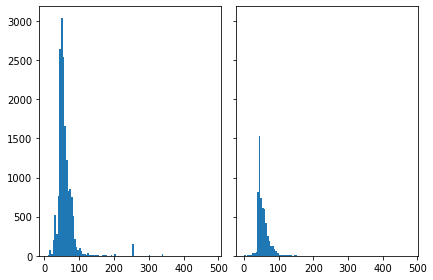

In [21]:
fig, axes = plt.subplots(1, 2, sharey=True, tight_layout=True)
axes[0].hist(data_train['rougher.input.feed_size'], bins=100)
axes[1].hist(data_test['rougher.input.feed_size'], bins=100)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

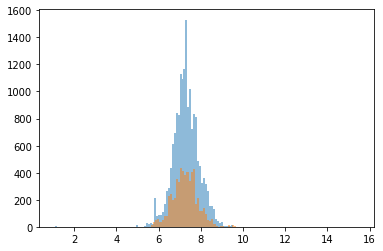

In [22]:
# Аналогично сравним размеры сырья после флотации
size = plt.subplot()
size.hist(data_train['primary_cleaner.input.feed_size'], alpha=0.5, bins=100) 
size.hist(data_test['primary_cleaner.input.feed_size'], alpha=0.5, bins=100)

plt.show

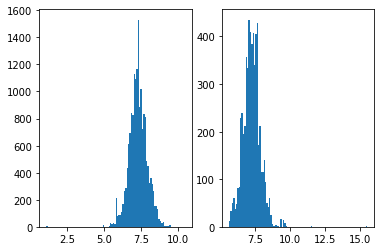

In [23]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(data_train['primary_cleaner.input.feed_size'], bins=100)
axes[1].hist(data_test['primary_cleaner.input.feed_size'], bins=100)
plt.show()

___Вывод___: до флотации можно заметить небольшие различия (есть "выбросы" в значениях у обучающей выборки, а так же часть значений из тестовой выборки не попадает в диапозон обучающей), но эти различия малы. 
После флотации значения тестовой выборки находятся в диапозоне обучающей выборки. 
Распределения отличаются друг от друга не сильно, а значит оценка модели будет правильной.

### 2.3 Изучение суммарной концентрации всех веществ на разных стадиях.

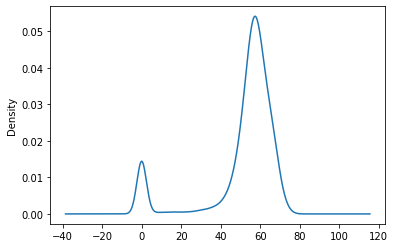

In [24]:
# Создадим отдельные столбцы, в которых будет посчитана суммарная концентрация всех веществ
data['rougher.full_concentrate'] = (data['rougher.input.feed_au'] + data['rougher.input.feed_ag'] + 
                                    data['rougher.input.feed_pb'] + data['rougher.input.feed_sol'])
data['rougher.full_concentrate'].plot(kind='kde')

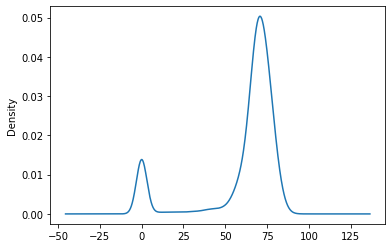

In [25]:
data['primary.full_concentrate'] = (data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_ag'] + 
                                    data['rougher.output.concentrate_pb'] + data['rougher.output.concentrate_sol'])
data['primary.full_concentrate'].plot(kind='kde')

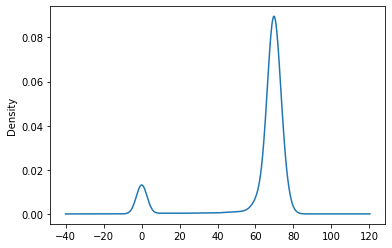

In [26]:
data['final.full_concentrate'] = (data['final.output.concentrate_au'] + data['final.output.concentrate_ag'] + 
                                    data['final.output.concentrate_pb'] + data['final.output.concentrate_sol'])
data['final.full_concentrate'].plot(kind='kde')

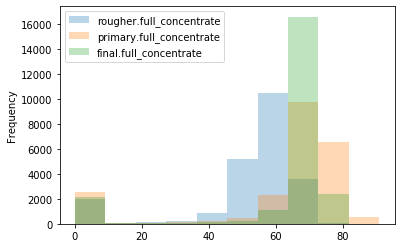

In [27]:
data[['rougher.full_concentrate', 'primary.full_concentrate', 'final.full_concentrate']].plot(kind='hist', alpha = 0.3)

___Вывод___: суммарная концентрация веществ в среднем находится в диапозоне от 40% до 80%. До флотации суммарная концентрация веществ самая маленькая, после флотации уровень концентрации становится выше, но после двух этапов очистки суммарная концентрация чуть уменьшается.

Так же можно заметить выбросы в значениях на всех этапах очистки (диапозон концентрации менее 10%). Эти данные можно отнести к выбросам и для лучшей работы модели стоит их удалить.

<a id='id_3'></a>
# 3. Модель

### 3.1 Функция для вычисления итоговой sMAPE

In [28]:
def smape(target, predictions):
    predictions = pd.DataFrame(predictions, columns=target_test.columns)
    target_rougher = target.iloc[:, 0]
    target_final = target.iloc[:, 1]
    predict_rougher = predictions.iloc[:, 0]
    predict_final = predictions.iloc[:, 1]      
    
    rou_dif = abs(target_rougher - predict_rougher)
    rou_sum = (abs(target_rougher) + abs(predict_rougher))/2
    total_rougher =  (rou_dif / rou_sum).mean() * 100
           
    fin_dif = abs(target_final - predict_final)
    fin_sum = (abs(target_final) + abs(predict_final))/2
    total_final =  (fin_dif / fin_sum).mean() * 100
    
    total = total_rougher * 0.25 + total_final * 0.75
    return total

### 3.2 Обучение модели и оценка её качества

In [29]:
# Для начала подготовим обучающую и тестовую выборки к обработке
# Избавимся от выбросов, которые мы обнаружили ранее
# Сначала удалим значения с аномально большим размером сырья
data_train = data_train[data_train['rougher.input.feed_size'] <= 200]

In [30]:
# Теперь удалим значения с нулевой концентрацией веществ, проделаем действия аналогичные пункту 2.3
data_train['rougher.full_concentrate'] = (data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_ag'] + 
                                    data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_sol'])

data_train['primary.full_concentrate'] = (data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] + 
                                    data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_sol'])

data_train['final.full_concentrate'] = (data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_ag'] + 
                                    data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol'])
data_train = data_train[(data_train['rougher.full_concentrate'] > 0) & (data_train['primary.full_concentrate'] > 0) & 
                      (data_train['final.full_concentrate'] > 0)]

In [31]:
# Проведем аналогичные действия для тестовой выборки
data_test['rougher.full_concentrate'] = (data_test['rougher.input.feed_au'] + data_test['rougher.input.feed_ag'] + 
                                    data_test['rougher.input.feed_pb'] + data_test['rougher.input.feed_sol'])

data_test['primary.full_concentrate'] = (data_test['rougher.output.concentrate_au'] + data_test['rougher.output.concentrate_ag'] + 
                                    data_test['rougher.output.concentrate_pb'] + data_test['rougher.output.concentrate_sol'])

data_test['final.full_concentrate'] = (data_test['final.output.concentrate_au'] + data_test['final.output.concentrate_ag'] + 
                                    data_test['final.output.concentrate_pb'] + data_test['final.output.concentrate_sol'])

data_test = data_test[(data_test['rougher.full_concentrate'] > 0) & (data_test['primary.full_concentrate'] > 0) & 
                      (data_test['final.full_concentrate'] > 0 )]

In [32]:
# Обнулим индексы
data_train = data_train.reset_index()
data_test = data_test.reset_index()

In [33]:
# Теперь удалим все ненужные столбцы
data_test = data_test.drop(['index', 'date', 'rougher.full_concentrate', 'primary.full_concentrate', 'final.full_concentrate'], axis=1)
data_train = data_train.drop(['index', 'date', 'rougher.full_concentrate', 'primary.full_concentrate', 'final.full_concentrate'], axis=1)

In [34]:
data_test1 = data_test
data_train1 = data_train
data1 = data

In [35]:
# Из-за проделанных ранее действий с датафреймами, порядок столбцов может отличаться, а значит отсортируем их по названию
data = data.sort_index(axis=1)
data_train = data_train.sort_index(axis=1)
data_test = data_test.sort_index(axis=1)

In [36]:
# Обработаем исходный датафрейм, т.к. он пригодится нам при масштабировании
# Удалим все ненужные столбцы
data = data.drop(['date', 'rougher.full_concentrate', 'primary.full_concentrate', 'final.full_concentrate'], axis=1)

In [37]:
# Разобъем выборки на признаки и целевой признак, в условиях данной задачи - целевых признаков у нас будет 2
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]
features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = data_test[['rougher.output.recovery', 'final.output.recovery']]

In [38]:
features_train = features_train.drop('rougher.output.recovery2', axis=1)

In [39]:
# Не забываем про масштабирование признаков
# Чтобы масштабирование было корректным - обучим его на исходном датафрейме
features_data = data.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
scaler = StandardScaler()
scaler.fit(features_data)
features_train_scaler = scaler.transform(features_train)
features_test_scaler = scaler.transform(features_test)
features_train_scaler

array([[ 0.63028585,  0.16989118,  0.25093841, ...,  0.01289019,
        -0.55874858, -1.11173413],
       [ 0.61753992,  0.20752885,  0.2752556 , ...,  0.01151172,
        -0.58152483, -1.03307449],
       [ 0.63054206,  0.20426969,  0.35040397, ...,  0.01231254,
        -0.57701235, -1.05438254],
       ...,
       [-0.81173826,  0.50989993,  0.72464902, ...,  0.01979045,
         0.31061528,  0.24356371],
       [-0.68579587,  0.48128048,  0.78328987, ...,  0.01902334,
         0.3140544 ,  0.2551647 ],
       [-0.57263635,  0.47324867,  0.81771132, ...,  0.01772501,
         0.31053346,  0.27379286]])

In [40]:
# Приведем признаки в формат датафрейма
features_train_scaler = pd.DataFrame(features_train_scaler, columns=features_train.columns)
features_test_scaler = pd.DataFrame(features_test_scaler, columns=features_test.columns)
features_train_scaler

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,0.630286,0.169891,0.250938,-0.785403,0.426454,-0.533204,-1.311945,1.801825,0.509064,-0.062967,...,-0.612844,-0.014691,-0.385716,-0.281900,-0.764436,0.079964,-0.607069,0.012890,-0.558749,-1.111734
1,0.617540,0.207529,0.275256,-0.850083,0.440764,-0.468769,-1.285297,1.736751,0.550881,-0.062967,...,-0.616524,-0.051182,-0.411881,-0.246516,-0.746732,0.055050,-0.623488,0.011512,-0.581525,-1.033074
2,0.630542,0.204270,0.350404,-0.817430,0.453284,-0.442800,-1.263430,1.634075,0.804840,-0.062967,...,-0.613116,-0.015089,-0.418492,-0.244444,-0.741797,0.055597,-0.618450,0.012313,-0.577012,-1.054383
3,0.626650,0.206657,0.277732,-0.953539,0.429502,-0.530289,-1.321673,1.712225,0.806299,-0.062967,...,-0.609895,0.005044,-0.403296,-0.245075,-0.757466,0.068022,-0.624774,0.015557,-0.580453,-1.035789
4,0.675913,0.212884,0.328483,-0.932601,0.411878,-0.602427,-1.397388,1.710500,0.953560,-0.062967,...,-0.611276,0.017372,-0.411436,-0.243613,-0.764425,0.034731,-0.639147,0.014315,-0.581779,-1.055283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14977,-0.755474,0.503863,0.700688,-0.449447,-0.036958,-1.016923,0.558175,0.233682,-0.013621,-1.277850,...,0.738204,0.001285,0.999182,-0.229876,0.494755,0.059546,0.244335,0.016799,0.313139,0.246448
14978,-0.769643,0.515150,0.698579,-0.434215,-0.000931,-0.951273,0.548977,0.268968,-0.030125,-1.277850,...,0.727503,-0.004099,1.004101,-0.235222,0.493586,0.052033,0.236193,0.020029,0.307282,0.249759
14979,-0.811738,0.509900,0.724649,-0.428056,-0.104689,-0.963822,0.366573,0.405416,-0.031999,-1.277850,...,0.735839,-0.005295,0.989315,-0.231100,0.496860,0.051283,0.248196,0.019790,0.310615,0.243564
14980,-0.685796,0.481280,0.783290,-0.450497,-0.034834,-0.958887,0.289803,0.248315,-0.024765,-1.277850,...,0.737225,0.001461,1.007334,-0.235885,0.490622,0.067068,0.242828,0.019023,0.314054,0.255165


In [41]:
features_test_scaler

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,final.output.tail_ag,final.output.tail_au,final.output.tail_pb,final.output.tail_sol,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,1.375912,0.062938,0.427776,0.895109,1.068933,1.353705,1.143394,0.395898,1.720272,1.281504,...,-0.911581,0.042095,-1.100837,-0.246073,-1.072840,0.964031,-1.161902,0.018265,1.310314,0.267065
1,1.491188,-0.021228,0.462998,0.953488,1.108517,1.461749,1.205413,0.409680,1.718866,1.281504,...,-0.906398,0.031204,-1.080815,-0.228770,-1.071016,-0.288834,-1.160805,0.016716,1.059317,0.265636
2,1.397949,0.061483,0.414813,0.978769,1.150469,1.582921,1.295052,0.375262,1.195392,0.806350,...,-0.920752,0.030336,-1.086785,-0.241245,-1.053440,0.046588,-1.156260,0.020855,1.055584,0.255203
3,1.852804,-0.044367,0.439102,1.175980,1.002076,1.693790,1.090347,0.415255,0.976762,0.568772,...,-0.910152,0.035377,-1.090629,-0.227099,-1.080550,0.045692,-1.151714,0.019180,1.048744,0.280049
4,1.620900,0.026795,0.353101,1.020686,0.825974,1.920065,0.966763,0.475010,0.647054,0.390590,...,-0.911309,0.005901,-1.094178,-0.236750,-1.047700,-0.070298,-1.147169,0.014266,1.056845,0.252165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,0.113662,0.480706,0.195925,0.598208,1.423324,0.843335,0.751077,1.044954,1.961845,1.265305,...,-0.615973,0.013514,-0.391106,-0.229179,-1.068057,0.063809,-0.978384,0.019151,-1.327566,0.266461
5288,0.092368,0.499686,0.201355,0.302768,1.050665,0.779373,0.419185,1.144162,1.971606,1.265305,...,-0.203251,0.063447,-0.164094,-0.223422,-0.863714,0.098951,-0.729339,0.019436,-1.327616,0.264541
5289,0.005641,0.549901,0.229256,-0.073080,0.912544,0.858832,0.310110,0.913121,1.969382,1.265305,...,0.282987,0.017945,0.139948,-0.231928,-0.598701,0.079460,-0.444229,0.018228,-1.328330,0.292003
5290,-0.144906,0.617939,0.123433,-0.018444,0.968065,0.732155,0.348109,0.658894,1.831279,1.265305,...,0.277686,0.015919,0.126888,-0.229700,-0.595206,0.057528,-0.446160,0.019499,-1.323771,0.261286


In [42]:
state = np.random.RandomState(123)
# Далее, при обучении моделей будет возникать предупреждение, уберем его сразу
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [43]:
# Начнем с Дерева Решений
for depth in range(1, 10):
    model = DecisionTreeRegressor(max_depth=depth, random_state=state)
    score = cross_val_score(model, features_train, target_train, cv=5)
    score = pd.Series(abs(score))
    final_score = score.mean()
    model.fit(features_train, target_train)
    predict = model.predict(features_test)
    smape_model = smape(target_test, predict)
    print(depth, 'score =', final_score, 'smape =', smape_model)
    

1 score = 0.11099564260021613 smape = 8.287552563963464
2 score = 0.16211702370869033 smape = 8.640426865447818
3 score = 0.17183204191996204 smape = 7.263490742631618
4 score = 0.3734285339540354 smape = 6.752385721071185
5 score = 0.3028763866983811 smape = 6.49846386160033
6 score = 0.28984220457954185 smape = 6.157204910379067
7 score = 0.32220754417730674 smape = 5.910718264673493
8 score = 0.25594784537782367 smape = 5.220832226124561
9 score = 0.37378670750821763 smape = 5.001548825395032


In [44]:
# Финальное значение max_depth в Дереве Решений будет 9, т.к. при нем самый низкий показатель smape
tree = DecisionTreeRegressor(max_depth=9, random_state=state)
tree.fit(features_train, target_train)
tree_predict = tree.predict(features_test)
tree_model = smape(target_test, tree_predict)
print('smape у Дерева решений составляет', tree_model)

smape у Дерева решений составляет 5.0651234094321325


In [45]:
# Теперь случайный лес
for estimator in range(1, 10):
    model = RandomForestRegressor(n_estimators=estimator, random_state=state)
    score = cross_val_score(model, features_train, target_train, cv=5)
    score = pd.Series(abs(score))
    final_score = score.mean()
    model.fit(features_train, target_train)
    predict = model.predict(features_test)
    smape_model = smape(target_test, predict)
    print(estimator, 'score =', final_score, 'smape =', smape_model)    

1 score = 0.34827496253104623 smape = 3.628614654279462
2 score = 0.2966618690837421 smape = 3.0216320075353704
3 score = 0.464361022130373 smape = 2.8778677163653623
4 score = 0.4901094704579531 smape = 2.8779416444634007
5 score = 0.4128489944159984 smape = 2.4770722552504214
6 score = 0.5761868749932253 smape = 2.391100037952924
7 score = 0.5261966305876365 smape = 2.3050851091383855
8 score = 0.5820370813341462 smape = 2.3424011888621608
9 score = 0.5799039271602784 smape = 2.3686126030509094


In [46]:
# n_estimators оставляет равным 8
forest = RandomForestRegressor(n_estimators=8, random_state=state)
forest.fit(features_train, target_train)
forest_predict = forest.predict(features_test)
forest_model = smape(target_test, forest_predict)
print('smape у Случайного Леса составляет', forest_model)

smape у Случайного Леса составляет 2.4087389114065587


In [47]:
# Проверим Линейную регрессию
linear = LinearRegression()
linear.fit(features_train, target_train)
linear_predict = linear.predict(features_test)
linear_model = smape(target_test, linear_predict)
print('smape у Линейной регрессии', linear_model)

smape у Линейной регрессии 3.510556919548793


### Вывод: 
На данном этапе мы подобрали 3 основных модели, которые решат нашу задачу. Показатель симметричного среднего абсолютного процентного отклонения (smape) составил:

    - для Дерева решений около 5%
    
    - для Случайного леса около 2,5%
    
    - для Линейной регрессии около 3,5%

In [48]:
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 86 columns):
primary_cleaner.input.sulfate                         5292 non-null float64
primary_cleaner.input.depressant                      5292 non-null float64
primary_cleaner.input.feed_size                       5292 non-null float64
primary_cleaner.input.xanthate                        5292 non-null float64
primary_cleaner.state.floatbank8_a_air                5292 non-null float64
primary_cleaner.state.floatbank8_a_level              5292 non-null float64
primary_cleaner.state.floatbank8_b_air                5292 non-null float64
primary_cleaner.state.floatbank8_b_level              5292 non-null float64
primary_cleaner.state.floatbank8_c_air                5292 non-null float64
primary_cleaner.state.floatbank8_c_level              5292 non-null float64
primary_cleaner.state.floatbank8_d_air                5292 non-null float64
primary_cleaner.state.floatbank8_d_level              529

In [49]:
# Как вариант - удалю все столбцы, кроме категориальных признаков из обеих выборок
data_test1 = data_test1.drop(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.tail_ag',
       'rougher.output.tail_au', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'secondary_cleaner.output.tail_ag',
       'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol'], axis=1)
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 54 columns):
primary_cleaner.input.sulfate                 5292 non-null float64
primary_cleaner.input.depressant              5292 non-null float64
primary_cleaner.input.feed_size               5292 non-null float64
primary_cleaner.input.xanthate                5292 non-null float64
primary_cleaner.state.floatbank8_a_air        5292 non-null float64
primary_cleaner.state.floatbank8_a_level      5292 non-null float64
primary_cleaner.state.floatbank8_b_air        5292 non-null float64
primary_cleaner.state.floatbank8_b_level      5292 non-null float64
primary_cleaner.state.floatbank8_c_air        5292 non-null float64
primary_cleaner.state.floatbank8_c_level      5292 non-null float64
primary_cleaner.state.floatbank8_d_air        5292 non-null float64
primary_cleaner.state.floatbank8_d_level      5292 non-null float64
rougher.input.feed_ag                         5292 non-null float64
rougher.i

In [50]:
data_train1 = data_train1.drop(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.tail_ag',
       'rougher.output.tail_au', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'secondary_cleaner.output.tail_ag',
       'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol'], axis=1)
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14982 entries, 0 to 14981
Data columns (total 55 columns):
final.output.recovery                         14982 non-null float64
primary_cleaner.input.sulfate                 14982 non-null float64
primary_cleaner.input.depressant              14982 non-null float64
primary_cleaner.input.feed_size               14982 non-null float64
primary_cleaner.input.xanthate                14982 non-null float64
primary_cleaner.state.floatbank8_a_air        14982 non-null float64
primary_cleaner.state.floatbank8_a_level      14982 non-null float64
primary_cleaner.state.floatbank8_b_air        14982 non-null float64
primary_cleaner.state.floatbank8_b_level      14982 non-null float64
primary_cleaner.state.floatbank8_c_air        14982 non-null float64
primary_cleaner.state.floatbank8_c_level      14982 non-null float64
primary_cleaner.state.floatbank8_d_air        14982 non-null float64
primary_cleaner.state.floatbank8_d_level      14982 non-null fl

In [51]:
data_train1 = data_train1.drop('rougher.output.recovery2', axis=1)

In [52]:
data1 = data1.drop(['date', 'final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.tail_ag',
       'rougher.output.tail_au', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'secondary_cleaner.output.tail_ag',
       'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol', 'rougher.full_concentrate', 
        'primary.full_concentrate', 'final.full_concentrate'], axis=1)

In [53]:
features_train1 = data_train1.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train1 = data_train1[['rougher.output.recovery', 'final.output.recovery']]
features_test1 = data_test1.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test1 = data_test1[['rougher.output.recovery', 'final.output.recovery']]

In [61]:
features_test1.shape , features_train1.shape

((5292, 52), (14982, 52))

In [54]:
features_data1 = data1.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
scaler1 = StandardScaler()
scaler1.fit(features_data1)
features_train_scaler1 = scaler1.transform(features_train1)
features_test_scaler1 = scaler1.transform(features_test1)
features_train_scaler1 = pd.DataFrame(features_train_scaler1, columns=features_train1.columns)
features_test_scaler1 = pd.DataFrame(features_test_scaler1, columns=features_test1.columns)

In [55]:
for depth in range(1, 10):
    model = DecisionTreeRegressor(max_depth=depth, random_state=state)
    score = cross_val_score(model, features_train1, target_train1, cv=5)
    score = pd.Series(abs(score))
    final_score = score.mean()
    model.fit(features_train1, target_train1)
    predict = model.predict(features_test1)
    smape_model = smape(target_test1, predict)
    print(depth, 'score =', final_score, 'smape =', smape_model)

1 score = 0.13811851284309556 smape = 8.266768104043647
2 score = 0.15753585565797942 smape = 7.643246175912576
3 score = 0.2972819793340079 smape = 8.345241321530501
4 score = 0.23851855713395853 smape = 8.388251625823816
5 score = 0.565193140469799 smape = 7.849340385708198
6 score = 0.4897111970908248 smape = 8.317147010129418
7 score = 0.6705835087395737 smape = 8.24573922788289
8 score = 0.6729738642204405 smape = 8.84690638548968
9 score = 1.0352785297117952 smape = 9.04544856989483


In [56]:
# Финальное значение max_depth в Дереве Решений будет 7
tree = DecisionTreeRegressor(max_depth=7, random_state=state)
tree.fit(features_train1, target_train1)
tree_predict = tree.predict(features_test1)
tree_model = smape(target_test1, tree_predict)
print('smape у Дерева решений составляет', tree_model)

smape у Дерева решений составляет 8.238176187974336


In [57]:
for estimator in range(2, 11):
    model = RandomForestRegressor(n_estimators=estimator, random_state=state)
    score = cross_val_score(model, features_train1, target_train1, cv=5)
    score = pd.Series(abs(score))
    final_score = score.mean()
    model.fit(features_train1, target_train1)
    predict = model.predict(features_test1)
    smape_model = smape(target_test1, predict)
    print(estimator, 'score =', final_score, 'smape =', smape_model)    

2 score = 1.0790485372293488 smape = 12.442396705056245
3 score = 0.5786225155587061 smape = 10.095644561700894
4 score = 0.7359345849201677 smape = 9.67345219282862
5 score = 0.5385426525380697 smape = 9.15659019488768
6 score = 0.29783534247276167 smape = 8.64528986799396
7 score = 0.1278489802429223 smape = 9.584410119763415
8 score = 0.3957392744444867 smape = 9.376052073279503
9 score = 0.4649202227429051 smape = 8.72438108891485
10 score = 0.16233591473746428 smape = 8.734561565047178


In [58]:
# n_estimators оставляет равным 4
forest = RandomForestRegressor(n_estimators=4, random_state=state)
forest.fit(features_train1, target_train1)
forest_predict = forest.predict(features_test1)
forest_model = smape(target_test1, forest_predict)
print('smape у Случайного Леса составляет', forest_model)

smape у Случайного Леса составляет 9.44185418456431


In [59]:
# Проверим Линейную регрессию
linear = LinearRegression()
linear.fit(features_train1, target_train1)
linear_predict = linear.predict(features_test1)
linear_model = smape(target_test1, linear_predict)
print('smape у Линейной регрессии', linear_model)

smape у Линейной регрессии 7.6534127182128024


In [60]:
# Сравним с константой
median = target_train1.median()
median_model = pd.DataFrame(index=range(len(target_test1)),columns=["rougher.output.recovery", "final.output.recovery"])
median_model["rougher.output.recovery"] = median[0]
median_model["final.output.recovery"] = median[1]
median_smape = smape(median_model, target_test1)
median_smape

7.723160624623936

# Общий вывод2:
После измененной обработки - в лидерах Линейная регрессия (7,5%), однако этот показатель достаточно близок к медианным предсказаниям, а значит возможна ошибка в прогнозах.
Дерева решений smape составил около 8%, у Случайного леса - чуть больше 9% (хотя, в предыдущем варианте эта модель была лидером, теперь же она хуже остальных).
Из-за 